In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
crop = pd.read_csv('West_Bengal_districtwise_data - Sheet1.csv')

In [3]:
crop.head()

,District,Soil_Type,N,P,K,pH,Rainfall,Humidity,Temperature
0,Hooghly,Alluvial,150,90,120,7.2,1725,75,28
1,Hooghly,Alluvial,189,78,195,6.7,1786,73,21
2,Hooghly,Alluvial,110,56,115,7.4,1603,77,27
3,Hooghly,Alluvial,177,62,187,6.6,1832,76,24
4,Hooghly,Alluvial,136,80,159,6.9,1920,71,20


In [4]:
crop.shape

(1891, 9)

In [5]:
crop.info

<bound method DataFrame.info of         District          Soil_Type   N   P    K    pH  Rainfall   Humidity  \
0        Hooghly           Alluvial  150  90  120  7.2       1725        75   
1        Hooghly           Alluvial  189  78  195  6.7       1786        73   
2        Hooghly           Alluvial  110  56  115  7.4       1603        77   
3        Hooghly           Alluvial  177  62  187  6.6       1832        76   
4        Hooghly           Alluvial  136  80  159  6.9       1920        71   
...          ...                ...  ...  ..  ...  ...        ...       ...   
1886  Darjeeling  Hill & Red/Yellow   80  25   80  5.1       2060        88   
1887  Darjeeling  Hill & Red/Yellow   85  28   85  5.2       2110        90   
1888  Darjeeling  Hill & Red/Yellow   90  31   90  5.3       2160        92   
1889  Darjeeling  Hill & Red/Yellow   95  34   95  5.4       2210        94   
1890  Darjeeling  Hill & Red/Yellow  100  37  100  5.5       2260        96   

      Temperature  

In [6]:
crop.isnull()

,District,Soil_Type,N,P,K,pH,Rainfall,Humidity,Temperature
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1886,False,False,False,False,False,False,False,False,False
1887,False,False,False,False,False,False,False,False,False
1888,False,False,False,False,False,False,False,False,False
1889,False,False,False,False,False,False,False,False,False


In [7]:
crop.duplicated().sum()

463

In [8]:
crop=crop.drop_duplicates()

In [9]:
crop.duplicated().sum()

0

In [10]:
crop.head()

,District,Soil_Type,N,P,K,pH,Rainfall,Humidity,Temperature
0,Hooghly,Alluvial,150,90,120,7.2,1725,75,28
1,Hooghly,Alluvial,189,78,195,6.7,1786,73,21
2,Hooghly,Alluvial,110,56,115,7.4,1603,77,27
3,Hooghly,Alluvial,177,62,187,6.6,1832,76,24
4,Hooghly,Alluvial,136,80,159,6.9,1920,71,20


In [11]:
crop.shape

(1428, 9)

In [12]:
crop.info

<bound method DataFrame.info of         District          Soil_Type   N   P    K    pH  Rainfall   Humidity  \
0        Hooghly           Alluvial  150  90  120  7.2       1725        75   
1        Hooghly           Alluvial  189  78  195  6.7       1786        73   
2        Hooghly           Alluvial  110  56  115  7.4       1603        77   
3        Hooghly           Alluvial  177  62  187  6.6       1832        76   
4        Hooghly           Alluvial  136  80  159  6.9       1920        71   
...          ...                ...  ...  ..  ...  ...        ...       ...   
1886  Darjeeling  Hill & Red/Yellow   80  25   80  5.1       2060        88   
1887  Darjeeling  Hill & Red/Yellow   85  28   85  5.2       2110        90   
1888  Darjeeling  Hill & Red/Yellow   90  31   90  5.3       2160        92   
1889  Darjeeling  Hill & Red/Yellow   95  34   95  5.4       2210        94   
1890  Darjeeling  Hill & Red/Yellow  100  37  100  5.5       2260        96   

      Temperature  

In [13]:
corr=crop.corr()
corr

,N,P,K,pH,Rainfall,Humidity,Temperature
N,1.000000,0.389839,0.451931,0.497268,-0.096312,-0.072598,0.359263
P,0.389839,1.000000,0.130069,0.211971,0.207749,0.175957,0.135951
K,0.451931,0.130069,1.000000,0.382776,-0.045040,-0.117513,0.370401
pH,0.497268,0.211971,0.382776,1.000000,-0.405815,-0.374583,0.429650
Rainfall,-0.096312,0.207749,-0.045040,-0.405815,1.000000,0.595155,-0.270513
Humidity,-0.072598,0.175957,-0.117513,-0.374583,0.595155,1.000000,-0.236821
Temperature,0.359263,0.135951,0.370401,0.429650,-0.270513,-0.236821,1.000000


<AxesSubplot:>

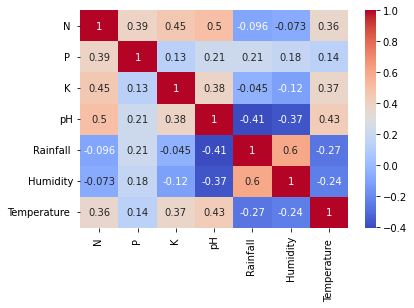

In [14]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')

In [15]:
crop['District'].value_counts()

Howrah                             160
South 24 Parganas                   99
Jalpaiguri                          94
Murshidabad                         90
Alipurduar                          88
Purba Bardhaman                     86
Nadia                               78
North 24 Parganas                   73
Paschim Bardhaman                   66
Cooch Behar                         63
Uttar Dinajpur (North Dinajpur)     61
Hooghly                             58
Darjeeling                          56
Purba Medinipur                     54
Birbhum                             54
Malda                               52
Paschim Medinipur                   48
Dakshin Dinajpur                    43
Jhargram                            28
Kolkata                             27
Kalimpong                           27
Purulia                             12
Bankura                             11
Name: District, dtype: int64

c:\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

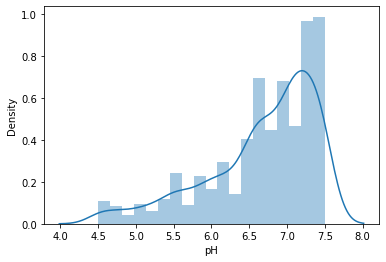

In [16]:
import matplotlib.pyplot as plt
sns.distplot(crop['pH'])

In [17]:
##Encoding
label_encoder_soil = LabelEncoder()
label_encoder_district = LabelEncoder()

In [18]:
# Assuming 'crop' is your DataFrame
# Ensure 'crop' is not a slice of another DataFrame, or explicitly create a copy if it is:
crop = crop.copy()
# Encoding 'soil_type'
crop.loc[:, 'soil_type_encoded'] = label_encoder_soil.fit_transform(crop['Soil_Type'])
# Encoding 'district'
crop.loc[:, 'district_encoded'] = label_encoder_district.fit_transform(crop['District'])


In [19]:
crop.head()

,District,Soil_Type,N,P,K,pH,Rainfall,Humidity,Temperature,soil_type_encoded,district_encoded
0,Hooghly,Alluvial,150,90,120,7.2,1725,75,28,0,6
1,Hooghly,Alluvial,189,78,195,6.7,1786,73,21,0,6
2,Hooghly,Alluvial,110,56,115,7.4,1603,77,27,0,6
3,Hooghly,Alluvial,177,62,187,6.6,1832,76,24,0,6
4,Hooghly,Alluvial,136,80,159,6.9,1920,71,20,0,6


In [20]:
#train and test

In [21]:

crop.columns

Index(['District', 'Soil_Type', 'N ', 'P ', 'K ', 'pH', 'Rainfall ',
       'Humidity', 'Temperature ', 'soil_type_encoded', 'district_encoded'],
      dtype='object')

In [22]:
# Adjusting the column references to match the DataFrame exactly, including trailing spaces
X = crop[['soil_type_encoded', 'N ', 'P ', 'K ', 'pH', 'Humidity', 'Temperature ', 'Rainfall ']]
y = crop['district_encoded']


In [23]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train

,soil_type_encoded,N,P,K,pH,Humidity,Temperature,Rainfall
330,2,130,72,180,6.3,75,26,2050
1558,1,115,70,70,5.7,76,19,2700
31,0,188,53,158,6.6,72,26,1877
214,0,191,91,197,7.5,78,20,1698
1284,0,110,80,120,7.5,76,26,1650
...,...,...,...,...,...,...,...,...
1505,0,120,70,140,7.4,79,28,1600
1549,1,100,125,80,4.9,92,21,2800
1757,0,170,135,135,6.4,91,29,2370
1186,1,150,75,130,7.1,78,27,1900


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}


for name, md in models.items():
    md.fit(X_train,y_train)
    ypred = md.predict(X_test)
    
    print(f"{name}  with accuracy : {accuracy_score(y_test,ypred)}")




c:\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  with accuracy : 0.3706293706293706
Naive Bayes  with accuracy : 0.5979020979020979
Support Vector Machine  with accuracy : 0.2867132867132867
K-Nearest Neighbors  with accuracy : 0.513986013986014
Decision Tree  with accuracy : 0.6258741258741258
Random Forest  with accuracy : 0.6678321678321678
Bagging  with accuracy : 0.6643356643356644
AdaBoost  with accuracy : 0.17132867132867133
Gradient Boosting  with accuracy : 0.6643356643356644
Extra Trees  with accuracy : 0.548951048951049


In [27]:
# #training the model
# rfc = RandomForestClassifier()
# rfc.fit(X_train,y_train)
# ypred = rfc.predict(X_test)
# accuracy_score(y_test,ypred)

# Initialize and train the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
##predictive system

In [ ]:
##function

In [37]:
# def predict_district(Soil_Type, N, P, K, pH, Humidity, Temperature, Rainfall):
#     # Encoding the 'soil_type' using the previously fitted LabelEncoder
#     soil_type_encoded = label_encoder_soil.transform([Soil_Type])[0]
    
#     # Preparing the feature DataFrame with correct order and column names
#     # Ensure the column names exactly match those used during the scaler fitting
#     features_df = pd.DataFrame([[soil_type_encoded, N, P, K, pH, Humidity, Temperature, Rainfall]],
#                                columns=['soil_type_encoded', 'N ', 'P ', 'K ', 'pH', 'Humidity', 'Temperature ', 'Rainfall '])
    
#     # Scaling the features using the same scaler used for the training data
#     features_scaled = scaler.transform(features_df)
    
#     # Making predictions with the trained model
#     district_encoded = model.predict(features_scaled)
    
#     # Decoding the predicted 'district'
#     predicted_district = label_encoder_district.inverse_transform(district_encoded)
    
#     return predicted_district[0]

# # Example prediction:
# predicted_district = predict_district('Alluvial', 121, 86, 195, 7.3, 74, 20, 1635)
# print(f'The predicted district is: {predicted_district}')






In [28]:
import pickle

# Serialize the RandomForestClassifier model
with open('rfc_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)

# Assuming you have scaler, label_encoder_soil, and label_encoder_district objects
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('label_encoder_soil.pkl', 'wb') as file:
    pickle.dump(label_encoder_soil, file)

with open('label_encoder_district.pkl', 'wb') as file:
    pickle.dump(label_encoder_district, file)


In [29]:
# Deserialize the RandomForestClassifier model
with open('rfc_model.pkl', 'rb') as file:
    rfc_deserialized = pickle.load(file)

# Deserialize the scaler
with open('scaler.pkl', 'rb') as file:
    scaler_deserialized = pickle.load(file)

# Deserialize the soil type label encoder
with open('label_encoder_soil.pkl', 'rb') as file:
    label_encoder_soil_deserialized = pickle.load(file)

# Deserialize the district label encoder
with open('label_encoder_district.pkl', 'rb') as file:
    label_encoder_district_deserialized = pickle.load(file)


In [30]:
def predict_district(Soil_Type, N, P, K, pH, Humidity, Temperature, Rainfall):
    # Encoding the 'Soil_Type' using the previously fitted and deserialized LabelEncoder
    soil_type_encoded = label_encoder_soil_deserialized.transform([Soil_Type])[0]
    
    # Preparing the feature DataFrame with the correct order and column names, including trailing spaces
    features_df = pd.DataFrame([[soil_type_encoded, N, P, K, pH, Humidity, Temperature, Rainfall]],
                               columns=['soil_type_encoded', 'N ', 'P ', 'K ', 'pH', 'Humidity', 'Temperature ', 'Rainfall '])
    
    # Scaling the features using the deserialized scaler
    features_scaled = scaler_deserialized.transform(features_df)
    
    # Making predictions with the deserialized RandomForestClassifier model
    district_encoded = rfc_deserialized.predict(features_scaled)
    
    # Decoding the predicted 'district' using the deserialized label encoder
    predicted_district = label_encoder_district_deserialized.inverse_transform([district_encoded])[0]
    
    return predicted_district

# Assuming the deserialization of components has been done correctly:
predicted_district = predict_district('Alluvial & Red/Yellow', 120, 72, 180, 6, 80, 25, 2200)
print(f'The predicted district is: {predicted_district}')


The predicted district is: Jalpaiguri


c:\python39\lib\site-packages\sklearn\preprocessing\_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
